plus_overflow_mask                 Electron.Phi  Muon.Phi  Jet.Phi
entry subentry                                 
0     0                False     False     True
      1                False     False     True
1     0                 True     False     True
      1                False     False     True
      2                False     False    False
...                      ...       ...      ...
20264 1                False     False    False
      2                False     False    False
      3                False     False    False
20265 0                False      True     True
      1                False     False    False

[57894 rows x 3 columns]
plus_overflow_mask                 Electron.Phi  Muon.Phi  Jet.Phi
entry subentry                                 
0     0                 True      True    False
      1                False     False    False
1     0                False      True    False
      1                False     False    False
      2                F

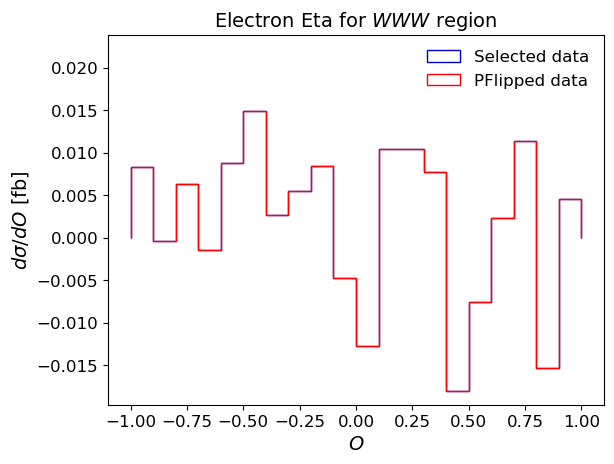

observable [-0.55948037  0.3878688   0.8444188  ...  2.4423466   2.0314336
 -0.22677131]
max observable Electron.Phi 3.1415281
min observable Electron.Phi -3.1410851
ML + Weight shape (20266,) (20266, 1)
chi_squared_0 about y=0: 20.904811173361843
chi_squared_1 about y=0: 20.904811173361843


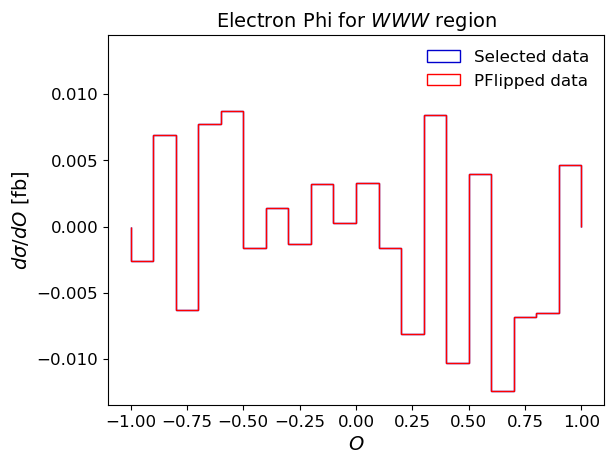

x_data, y_data, total_weight_data (40532, 66) (40532, 1) (40532, 1)
plus_overflow_mask                 Muon.Phi  Electron.Phi  Jet.Phi
entry subentry                                 
0     0            False          True     True
      1            False         False     True
      2            False         False     True
      3            False         False    False
1     0             True         False     True
...                  ...           ...      ...
84536 0            False         False     True
      1            False         False    False
84537 0             True          True     True
      1            False         False    False
      2            False         False    False

[273632 rows x 3 columns]
plus_overflow_mask                 Muon.Phi  Electron.Phi  Jet.Phi
entry subentry                                 
0     0             True         False    False
      1            False         False    False
      2            False         False    False
   

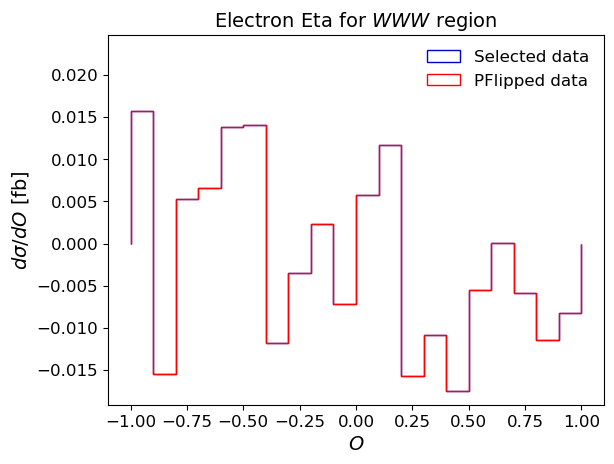

observable [ 1.796578  -1.8988342  2.6177738 ...  1.9907577 -0.7520234  2.027342 ]
max observable Electron.Phi 3.1415122
min observable Electron.Phi -3.1415687
ML + Weight shape (84538,) (84538, 1)
chi_squared_0 about y=0: 28.190233783157026
chi_squared_1 about y=0: 28.190233783157026


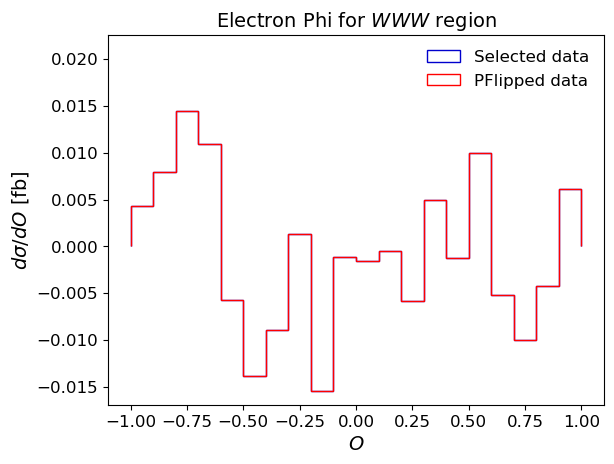

x_data, y_data, total_weight_data (169076, 72) (169076, 1) (169076, 1)
Epoch 1/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5008 - loss: 0.7135 - val_accuracy: 0.4883 - val_loss: 0.6987
Epoch 2/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5147 - loss: 0.6969 - val_accuracy: 0.5134 - val_loss: 0.6944
Epoch 3/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5234 - loss: 0.6934 - val_accuracy: 0.5110 - val_loss: 0.6939
Epoch 4/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5400 - loss: 0.6892 - val_accuracy: 0.5258 - val_loss: 0.6929
Epoch 5/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5437 - loss: 0.6860 - val_accuracy: 0.5287 - val_loss: 0.6918
Epoch 6/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5561 - loss: 0.6808 - val_accuracy: 0.5349 - val_loss: 0.6896
Epoch 7/50
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5638 - loss: 0.6775 - val_accuracy: 0.5300 - val_loss: 0.6921
Epoch 8/50
1014/101

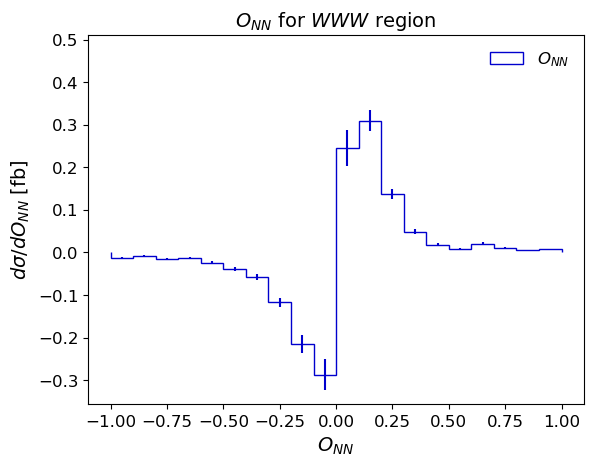

O_NN Fractional Uncertainty: [-0.14760934 -0.22150748 -0.1362328  -0.17300502 -0.16402392 -0.1249131
 -0.11690478 -0.08991547 -0.09481931 -0.12689133  0.17177979  0.07809416
  0.08334466  0.12421712  0.22651888  0.25548243  0.17399191  0.26135023
  0.25069595  0.19652029]


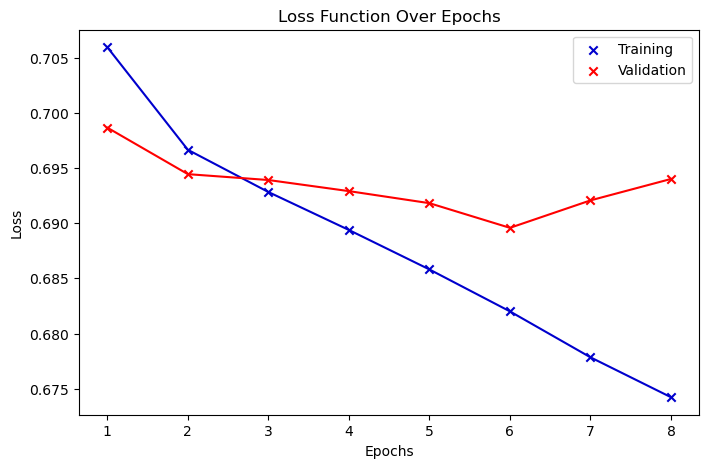

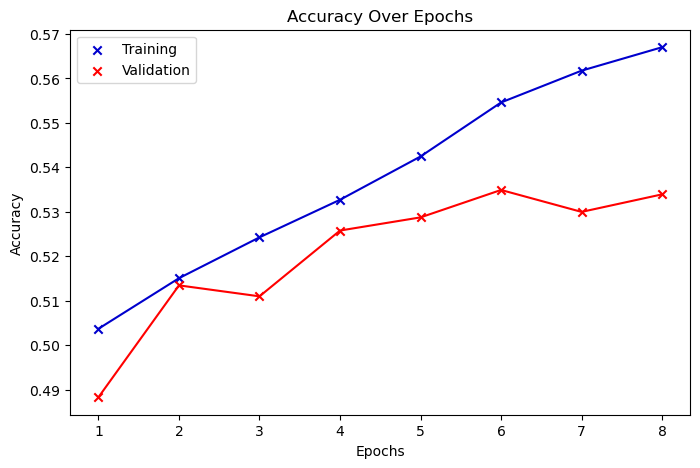

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import boost_histogram as bh
import tensorflow as tf
import sklearn as sk
import pandas as pd
import pyarrow.feather as feather

m_e = const.electron_mass / 1000
m_mu = 0.105658

def import_feather(file_name, selected_labels):
    df = feather.read_feather(file_name)
    df = df.set_index(['entry', 'subentry'])

    weight_data = df['Event.Weight'][:,0].values.reshape(-1, 1)
    
    feature_columns = df.columns.intersection(selected_labels).tolist()
    selected_df = df[feature_columns].copy()
    Pflipped_df = parity_transform(selected_df)
    
    selected_df = (selected_df.assign(counter=selected_df.groupby('entry').cumcount())
                   .pivot_table(index='entry', columns=['subentry'], values=feature_columns, dropna=False, fill_value=0))
    Pflipped_df = (Pflipped_df.assign(counter=Pflipped_df.groupby('entry').cumcount())
                   .pivot_table(index='entry', columns=['subentry'], values=feature_columns, dropna=False, fill_value=0))

    total_weight_data = np.vstack([weight_data, weight_data])
    y_data = np.array(total_weight_data)
    y_data = (y_data > 0).astype(int)
    
    x_data = np.concatenate([selected_df.to_numpy(), Pflipped_df.to_numpy()], axis=0)

    plot_kinematic_variable(selected_df, Pflipped_df, weight_data, 'Electron.Eta', 'WWW')
    plot_kinematic_variable(selected_df, Pflipped_df, weight_data, 'Electron.Phi', 'WWW')

    print('x_data, y_data, total_weight_data', x_data.shape, y_data.shape, total_weight_data.shape)
    return x_data, y_data, total_weight_data

def parity_transform(df):
    Pflipped_df = df.copy()

    flip_mask = Pflipped_df.columns.str.contains(r'\.PT|\.Eta')
    phi_mask = Pflipped_df.columns.str.contains(r'\.Phi')
    Pflipped_df.loc[:, flip_mask] *= -1 
    Pflipped_df.loc[:, phi_mask] += np.pi  

    plus_overflow_mask = Pflipped_df.loc[:, phi_mask] > np.pi
    minus_overflow_mask = Pflipped_df.loc[:, phi_mask] < -np.pi
    print("plus_overflow_mask", plus_overflow_mask)

    Pflipped_df.loc[:, phi_mask] = (Pflipped_df.loc[:, phi_mask] - 2 * np.pi * plus_overflow_mask).astype(np.float32)
    Pflipped_df.loc[:, phi_mask] = (Pflipped_df.loc[:, phi_mask] + 2 * np.pi * minus_overflow_mask).astype(np.float32)    

    return Pflipped_df

def bin_widths(histogram):
    bin_width = histogram[1:] - histogram[:-1]
    return bin_width

def chi_squared(observed, expected, uncertainty):
    chi_squared = np.sum(((observed - expected) / uncertainty) ** 2)
    return chi_squared

def train_ML_observable(x_data, y_data, weight_data):
    initial_epochs = 50
    x_data = sk.preprocessing.StandardScaler().fit_transform(x_data)

    x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    x_validate, x_test, y_validate, y_test = sk.model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)

    model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)

    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy']) 
    history = model.fit(x_train, y_train, epochs=initial_epochs, validation_data=(x_validate, y_validate), callbacks=early_stopping)
    model.evaluate(x_test, y_test, verbose=2)
    model.save('vbs_tensor_flow_eta_only.keras')

    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    final_epochs = len(history.history['loss'])
    print('test accuracy:', np.max(training_accuracy))
    print('validation accuracy:', np.max(validation_accuracy))
    if(initial_epochs != final_epochs):
        print('stopped at', final_epochs, 'epochs.')

    final_results = model.predict(x_data)
    
    return final_results, training_loss, validation_loss, training_accuracy, validation_accuracy, final_epochs

def preprocess_data(x_data, y_data):
    x_data = sk.preprocessing.StandardScaler().fit_transform(x_data)
    x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    x_validate, x_test, y_validate, y_test = sk.model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)
    return x_train, x_validate, x_test, y_train, y_validate, y_test

def load_ML_model(x_data):
    loaded_model = tf.keras.models.load_model('tensor_flow_1.keras')
    x_data = sk.preprocessing.StandardScaler().fit_transform(x_data)
    final_results = loaded_model.predict(x_data)

    return final_results 

def plot_ML_observable(ML_results, weight_data, region, interation):
    scale_factor = 1
    ML_observable = ML_results[:, 1] - ML_results[:, 0]

    bin_number = 20
    range_limit = (-1, 1)

    histogram_0 = bh.Histogram(bh.axis.Regular(bin_number, *range_limit, underflow=False, overflow=False))
    print('ML + Weight shape', ML_observable.shape, weight_data.shape)
    histogram_0.fill(ML_observable, weight=weight_data)
    
    bin_widths = histogram_0.axes[0].widths
    differential_cross_section_0 = histogram_0.view() / bin_widths
    
    hist_0_squared = bh.Histogram(histogram_0.axes[0])
    hist_0_squared.fill(ML_observable, weight=weight_data**2)

    uncertainty_0 = np.sqrt(hist_0_squared.view()) / bin_widths

    bin_centers = histogram_0.axes[0].centers
    bin_edges = histogram_0.axes[0].edges

    chi_squared_1 = chi_squared(differential_cross_section_0, 0, uncertainty_0)
    print('chi_squared_1 about y=0:', chi_squared_1)

    plt.figure()

    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_0 /scale_factor, label=r'$O_{NN}$', color='mediumblue', histtype='step')
    plt.errorbar(bin_centers, differential_cross_section_0 / scale_factor, yerr=uncertainty_0 /scale_factor, fmt='None', color='mediumblue')

    plt.title(f'$O_{{NN}}$ for ${region}$ region', fontsize=14)
    plt.xlabel(r'$O_{NN}$', fontsize=14)
    plt.ylabel(r'$d\sigma/dO_{NN}$ [fb]', fontsize=14)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.20 * (y_max - y_min))
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(frameon=False, fontsize=12)
    plt.savefig(f'O_NN_{interation}_{region}_jj.png', dpi=1000, bbox_inches='tight')
    plt.show()

    fractional_uncertainty_0 = np.divide(
        uncertainty_0, differential_cross_section_0,
        out=np.zeros_like(uncertainty_0),
        where=differential_cross_section_0 != 0
    )

    print('O_NN Fractional Uncertainty:', fractional_uncertainty_0)

def plot_accuracy(training_accuracy, validation_accuracy, epoch_number):    
    epoch_number = np.arange(1, epoch_number + 1)    
    plt.figure(figsize=(8, 5))
    plt.scatter(epoch_number, training_accuracy, label='Training', marker='x', color='mediumblue')
    plt.plot(epoch_number, training_accuracy, linestyle='-', color='mediumblue')
    plt.scatter(epoch_number, validation_accuracy, label='Validation', marker='x', color='red')
    plt.plot(epoch_number, validation_accuracy, linestyle='-', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    plt.show()   

def plot_loss(training_loss, validation_loss, epoch_number):    
    epoch_number = np.arange(1, epoch_number + 1)    
    plt.figure(figsize=(8, 5))
    plt.scatter(epoch_number, training_loss, label='Training', marker='x', color='mediumblue')
    plt.plot(epoch_number, training_loss, linestyle='-', color='mediumblue')
    plt.scatter(epoch_number, validation_loss, label='Validation', marker='x', color='red')
    plt.plot(epoch_number, validation_loss, linestyle='-', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function Over Epochs')
    plt.legend()
    plt.show()

def plot_kinematic_variable(selected_df, Pflipped_df, weight_data, kinematic_variable, region):
    observable = selected_df[kinematic_variable].iloc[:, 0].to_numpy()
    flipped_observable = Pflipped_df[kinematic_variable].iloc[:, 0].to_numpy()
    print("observable", observable)
    print(f"max observable {kinematic_variable}", np.max(observable))
    print(f"min observable {kinematic_variable}", np.min(observable))
    bin_number = 20
    range_limit = (-1, 1)

    histogram_0 = bh.Histogram(bh.axis.Regular(bin_number, *range_limit, underflow=False, overflow=False))
    histogram_1 = histogram_0.copy()
    print('ML + Weight shape', observable.shape, weight_data.shape)
    histogram_0.fill(observable, weight=weight_data)
    histogram_1.fill(flipped_observable, weight=weight_data)
    
    bin_widths = histogram_0.axes[0].widths
    differential_cross_section_0 = histogram_0.view() / bin_widths
    differential_cross_section_1 = histogram_1.view() / bin_widths

    hist_0_squared = bh.Histogram(histogram_0.axes[0])
    hist_1_squared = bh.Histogram(histogram_1.axes[0])
    hist_0_squared.fill(observable, weight=weight_data**2)
    hist_1_squared.fill(flipped_observable, weight=weight_data**2)

    uncertainty_0 = np.sqrt(hist_0_squared.view()) / bin_widths
    uncertainty_1 = np.sqrt(hist_1_squared.view()) / bin_widths

    bin_centers = histogram_0.axes[0].centers
    bin_edges = histogram_0.axes[0].edges

    chi_squared_0 = chi_squared(differential_cross_section_0, 0, uncertainty_0)
    print('chi_squared_0 about y=0:', chi_squared_0)
    chi_squared_1 = chi_squared(differential_cross_section_1, 0, uncertainty_1)
    print("chi_squared_1 about y=0:", chi_squared_1)

    plt.figure()

    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_0, label=r'Selected data', color='mediumblue', histtype='step')
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=differential_cross_section_1, label=r'PFlipped data', color='red', histtype='step')
    #plt.errorbar(bin_centers, differential_cross_section_0, yerr=uncertainty_0, fmt='None', color='mediumblue')

    plt.title(f'{kinematic_variable.replace(".", " ")} for ${region}$ region', fontsize=14)
    plt.xlabel(r'$O$', fontsize=14)
    plt.ylabel(r'$d\sigma/dO$ [fb]', fontsize=14)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min, y_max + 0.20 * (y_max - y_min))
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.legend(frameon=False, fontsize=12)
    plt.savefig(f'{kinematic_variable.replace(".", "_")}_{region}_decomposition.png', dpi=1000, bbox_inches='tight')
    plt.show()

def print_branches(tree):
    keys = tree.keys()
    for key in keys:
        print(key)
    
def __main__():
    x_data_WWW, y_data_WWW, weight_data_WWW = import_feather('WWW_data_cwtil_2.feather', ['Electron.Eta', 'Electron.Phi', 'Muon.Eta', 'Muon.Phi','Jet.Eta', 'Jet.Phi'])
    x_data_VBS, y_data_VBS, weight_data_VBS = import_feather('VBS_data_cwtil_2.feather', ['Electron.Eta', 'Electron.Phi', 'Muon.Eta', 'Muon.Phi','Jet.Eta', 'Jet.Phi'])

    ML_results_1, training_loss_1, validation_loss_1, training_accuracy_1, validation_accuracy_1, epoch_number = train_ML_observable(x_data_WWW, y_data_WWW, weight_data_WWW)
    plot_ML_observable(ML_results_1, weight_data_WWW, 'WWW', 2)
    plot_loss(training_loss_1, validation_loss_1, epoch_number)
    plot_accuracy(training_accuracy_1, validation_accuracy_1, epoch_number)

if __name__ == '__main__':
    __main__()